In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv(r"C:\Users\HP\Downloads\archive\train_u6lujuX_CVtuZ9i (1).csv")

In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [31]:
df['Loan_Status'].duplicated().count()

614

In [32]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

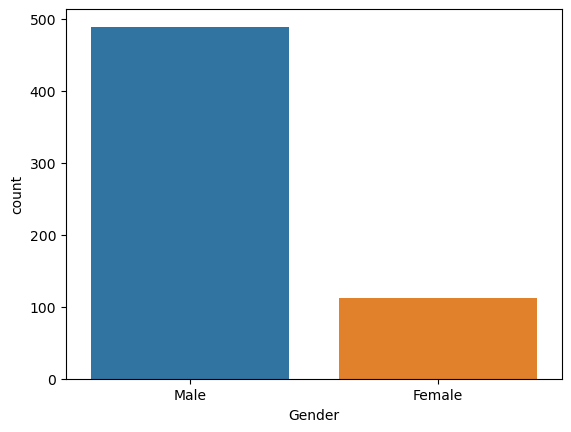

In [33]:

sns.countplot(x='Gender', data=df)
plt.show()

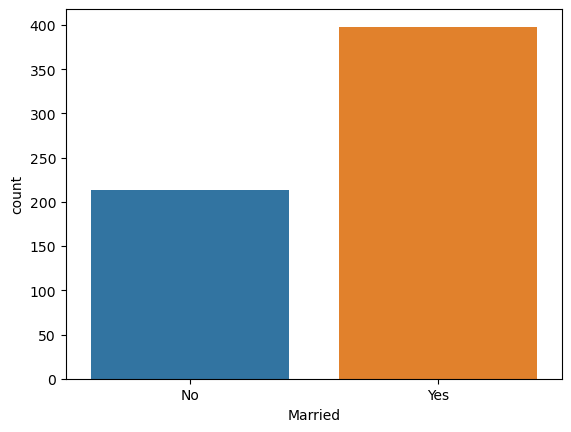

In [34]:
sns.countplot(x='Married', data=df)
plt.show()

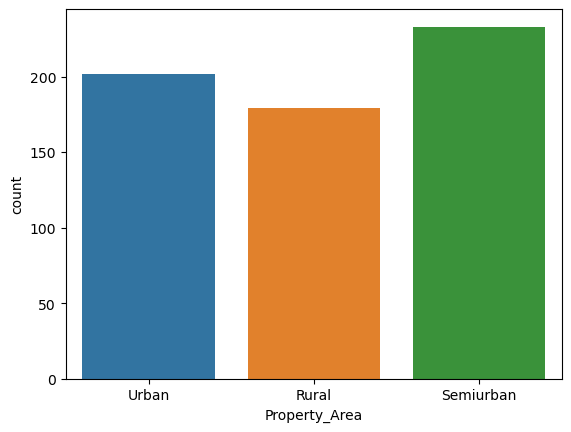

In [35]:
sns.countplot(x='Property_Area', data=df)
plt.show()

In [36]:
df.Loan_Amount_Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

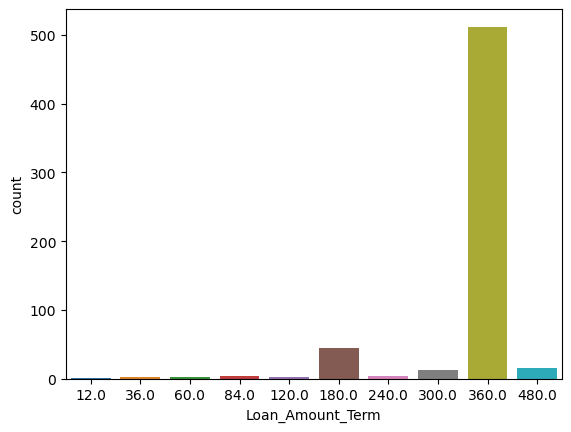

In [37]:
sns.countplot(x='Loan_Amount_Term', data=df)
plt.show()

In [38]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

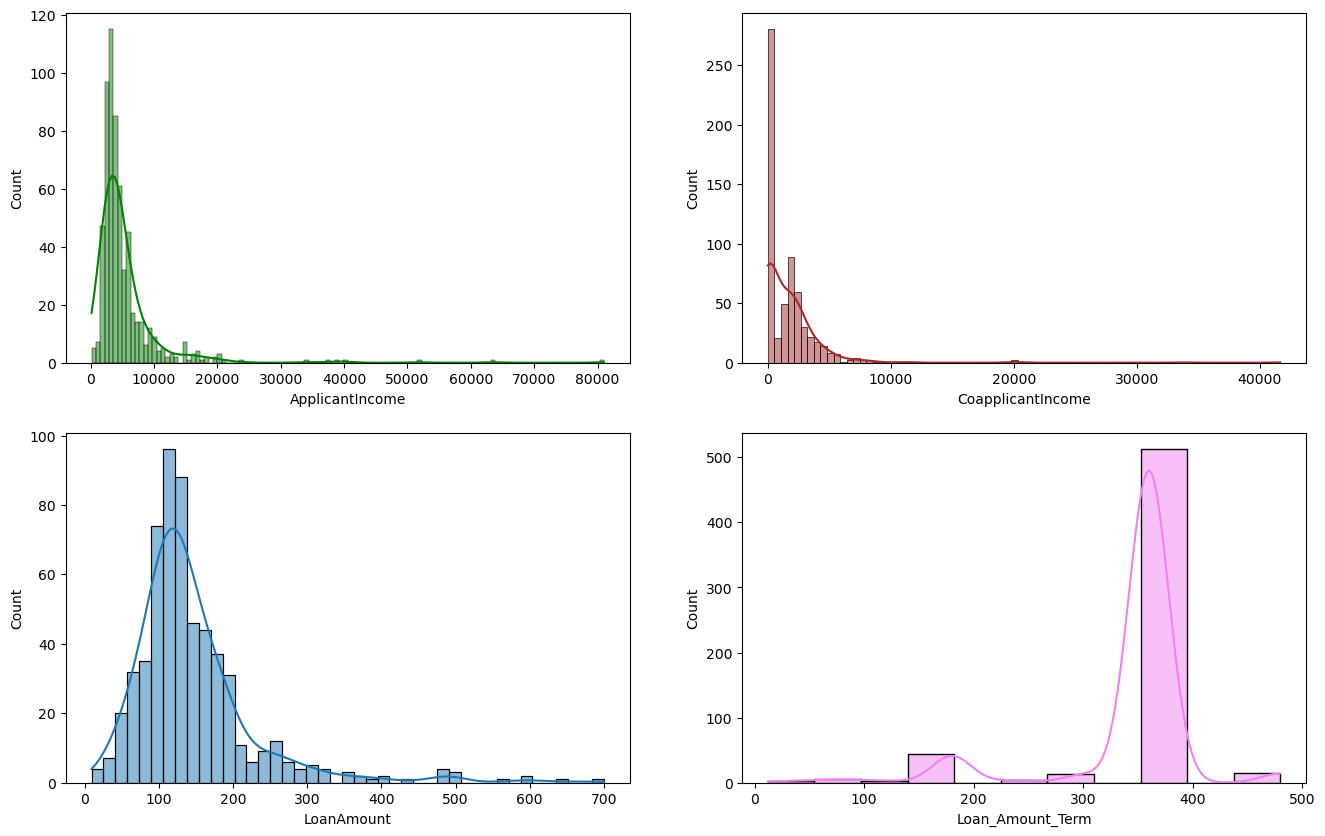

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(16,10))

sns.histplot(data=df, x='ApplicantIncome', kde=True, ax=axs[0,0], color='green')
sns.histplot(data=df, x='CoapplicantIncome', kde=True, ax=axs[0,1], color='brown')
sns.histplot(data=df, x='LoanAmount', kde=True, ax=axs[1,0])
sns.histplot(data=df, x='Loan_Amount_Term', kde=True, ax=axs[1,1], color='violet')

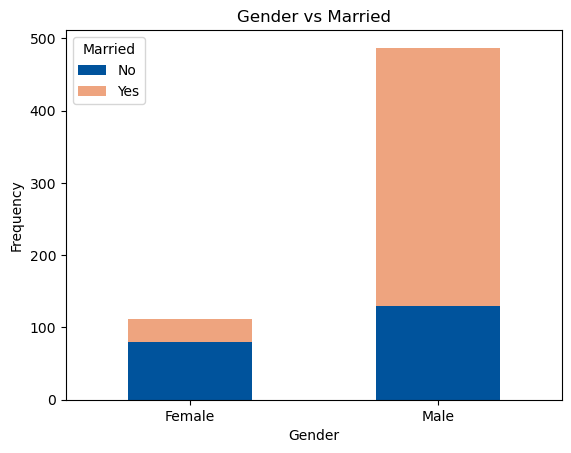

In [40]:
pd.crosstab(df.Gender, df.Married).plot(kind='bar', stacked=True, color=['#00539CFF', '#EEA47FFF'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.title('Gender vs Married')
plt.show()

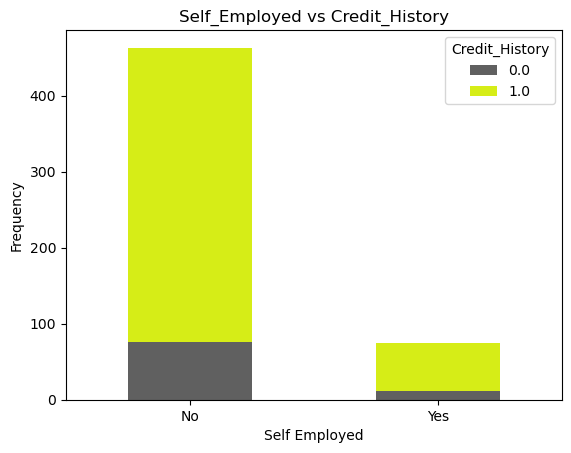

In [41]:
pd.crosstab(df.Self_Employed, df.Credit_History).plot(kind='bar', stacked=True, color=['#606060FF','#D6ED17FF'])

plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.title('Self_Employed vs Credit_History')
plt.show()

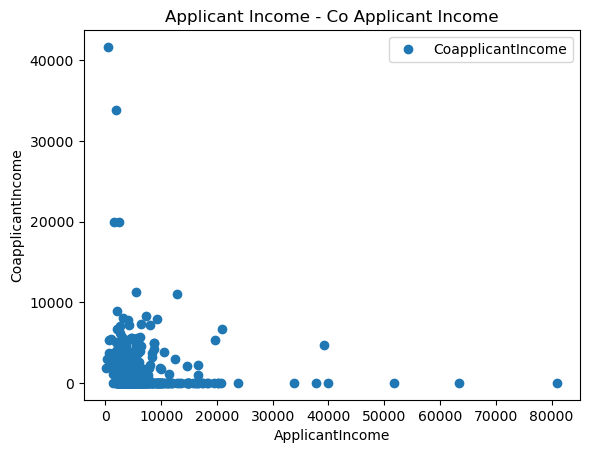

In [42]:
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')  
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()

In [43]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [46]:
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,7,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,8,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0


In [47]:
#df['Dependents'] = df['Dependents'].str.replace('+', '')

In [48]:
#df['Dependents'] = df['Dependents'].astype(float)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(8), int64(1)
memory usage: 43.3 KB


In [50]:
'''df['Gender'] = df['Gender'].map({'Male':0,'Female':1})
df['Married'] = df['Married'].map({'No':0,'Yes':1})
df['Education'] = df['Education'].map({'Graduate':0,'Not Graduate':1})
df['Self_Employed'] = df['Self_Employed'].map({'No':0,'Yes':1})
df['Property_Area'] = df['Property_Area'].map({'Urban':0,'Rural':1,'Semiurban':2})
df['Loan_Status'] = df['Loan_Status'].map({'N':0,'Y':1})
'''

"df['Gender'] = df['Gender'].map({'Male':0,'Female':1})\ndf['Married'] = df['Married'].map({'No':0,'Yes':1})\ndf['Education'] = df['Education'].map({'Graduate':0,'Not Graduate':1})\ndf['Self_Employed'] = df['Self_Employed'].map({'No':0,'Yes':1})\ndf['Property_Area'] = df['Property_Area'].map({'Urban':0,'Rural':1,'Semiurban':2})\ndf['Loan_Status'] = df['Loan_Status'].map({'N':0,'Y':1})\n"

In [51]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [52]:
df.drop('Loan_ID', axis = 1 , inplace = True)

In [53]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [54]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [55]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

In [56]:
df = df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]

In [57]:
df['ApplicantIncome'] = np.sqrt(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])
df['LoanAmount'] = np.sqrt(df['LoanAmount'])
df['Loan_Amount_Term'] = np.sqrt(df['Loan_Amount_Term'])

C:\Users\HP\AppData\Local\Temp\ipykernel_11988\1785361817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ApplicantIncome'] = np.sqrt(df['ApplicantIncome'])
C:\Users\HP\AppData\Local\Temp\ipykernel_11988\1785361817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])
C:\Users\HP\AppData\Local\Temp\ipykernel_11988\1785361817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [58]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,76.478755,0.000000,12.100089,18.973666,1.0,2,1
1,1,1,1,0,0,67.697858,38.832976,11.313708,18.973666,1.0,0,0
4,1,0,0,0,0,77.459667,0.000000,11.874342,18.973666,1.0,2,1
8,1,1,2,0,0,63.292970,39.064050,12.961481,18.973666,1.0,2,1
10,1,1,2,0,0,56.568542,26.457513,8.366600,18.973666,1.0,2,1


In [59]:
X= df.drop('Loan_Status', axis = 1)

In [60]:
y= df['Loan_Status']

In [61]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,76.478755,0.000000,12.100089,18.973666,1.0,2
1,1,1,1,0,0,67.697858,38.832976,11.313708,18.973666,1.0,0
4,1,0,0,0,0,77.459667,0.000000,11.874342,18.973666,1.0,2
8,1,1,2,0,0,63.292970,39.064050,12.961481,18.973666,1.0,2
10,1,1,2,0,0,56.568542,26.457513,8.366600,18.973666,1.0,2


In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [63]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 612
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             207 non-null    int32  
 1   Married            207 non-null    int32  
 2   Dependents         207 non-null    int32  
 3   Education          207 non-null    int32  
 4   Self_Employed      207 non-null    int32  
 5   ApplicantIncome    207 non-null    float64
 6   CoapplicantIncome  207 non-null    float64
 7   LoanAmount         207 non-null    float64
 8   Loan_Amount_Term   207 non-null    float64
 9   Credit_History     207 non-null    float64
 10  Property_Area      207 non-null    int32  
dtypes: float64(5), int32(6)
memory usage: 14.6 KB


In [64]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

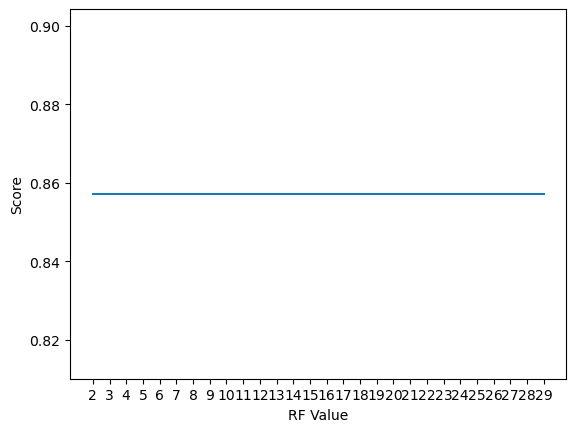

Random Forest Accuracy:  85.71%


In [67]:
ListRF = []
for i in range(2,30):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    ListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,30), ListRF)
plt.xticks(np.arange(2,30,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(ListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

In [68]:
import pickle


In [69]:
with open('model.pkl', 'wb') as file:
    pickle.dump(RFclassifier, file)
